<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/FaceMask_LR/FaceMask_LR_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Demo**

##**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##**Import thư viện cần dùng**

In [8]:
from google.colab.patches import cv2_imshow
import pickle
import cv2
import numpy as np

##**Load model**

In [3]:
# Load model
file_model =  open('/content/drive/My Drive/CS114/FaceMask/Model_LR/Model_LR.pkl', 'rb') 
Model_LR = pickle.load(file_model)

##**Load tool nhận diện khuôn mặt**

In [11]:
# load tool nhận nhận khuôn mặt của openCV
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/CS114/FaceMask/Model_LR/haarcascade_frontalface_default.xml')

##**Hàm dự đoán các khuôn mặt đeo khẩu trang**

In [87]:
def Predict_FaceMask(img):
  # Dùng tool cv2 để cắt các khuôn mặt từ ảnh 
  faces = face_cascade.detectMultiScale(img, 1.3, 5)

  # Kiểm tra xem có khuôn mặt nào được cắt ra không
  if (len(faces) != 0):

    # vòng lặp cắt nhiều khuôn mặt trong ảnh 
    for (x,y,w,h) in faces:

      # Cắt mặt từ các thông số trả về từ tool cv2
      face = img[y:y+h,x:x+w]

      # pre process Face
      face = cv2.resize(face,(32,32)).flatten()
      face = np.array(face).reshape(1,-1)

      # Dự đoán 
      result = Model_LR.predict(face)

      # Lấy label từ kết quả dự đoán
      if (result == 0):

        label = "without_mask"

        # Giá trị màu đỏ 
        color = (0, 0, 255)
      else:

        label = "mask"

        # Giá trị màu xanh
        color = (0,255,0)

      # Vẽ khung quanh khuôn mặt nhận dạng được
      cv2.rectangle(img,(x,y),(x+w,y+h),color,2)

      # Ghi chữ trên khung nhận diện được 
      cv2.putText(img, label, (x, y - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.45,color, 2)
      
    # show hình ảnh được load 
    cv2_imshow(img)

  else:
    print("-------------------No Face Detected !!!------------------")


##**Tiến hành demo**


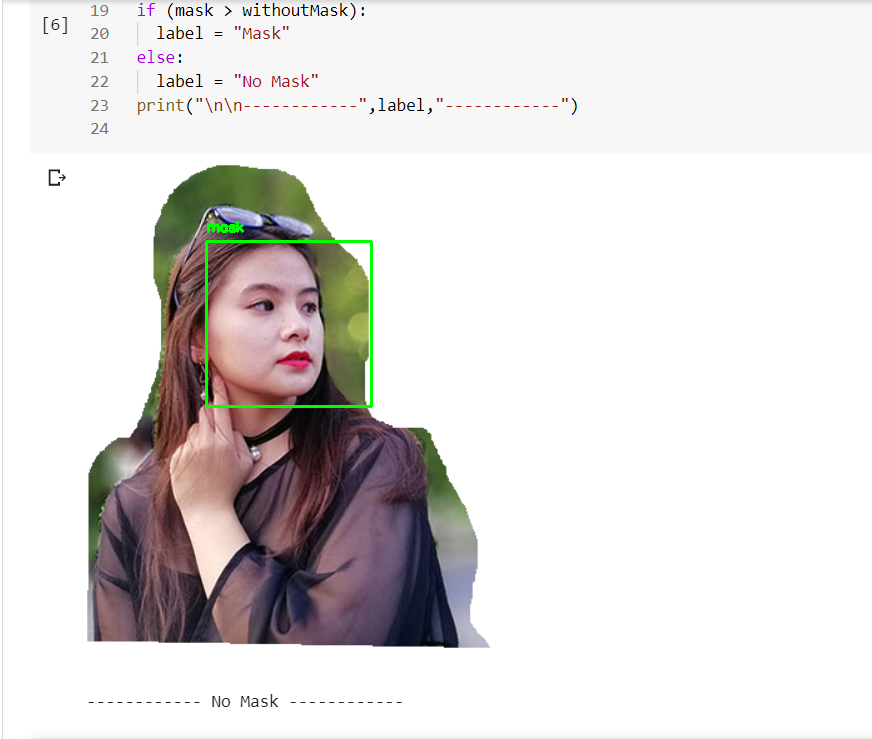

In [91]:
# Load hình 
img = cv2.imread("/content/predict_cut_img2.PNG")

# Dự đoán
Predict_FaceMask(img)